In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from skopt import dummy_minimize
from skopt.plots import plot_convergence
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args

In [2]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y = y.map({0:1, 1:0})

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

X_train.shape, X_test.shape

((398, 30), (171, 30))

In [7]:
# define the hyperparameter space

Integer(10, 120, name='n_estimators')

Integer(low=10, high=120, prior='uniform', transform='identity')

In [8]:
# define the space

param_grid = [
    Integer(10, 120, name='n_estimators'),
    Real(0, 0.999, name='min_samples_split'),
    Integer(1, 5, name='max_depth'),
    Categorical(['log_loss', 'exponential'], name='loss')
]

In [9]:
# model

gbm = GradientBoostingClassifier(random_state=0)

In [10]:
# define the objective function

@use_named_args(param_grid)
def objective(**params):
    gbm.set_params(**params)
    
    value = np.mean(
        cross_val_score(
            gbm, X_train, y_train, cv=3, n_jobs=-1 ,scoring='accuracy'))
    
    return -value

In [11]:
# random search

search = dummy_minimize(
    objective,
    param_grid,
    n_calls=100,
    random_state=0)

In [12]:
print('Best score=%.4f' % search.fun)

Best score=-0.9648


In [13]:
print('''Best params:
========================
- n_setimators=%d
- min_samples_split=%.6f
- max_depth=%d
- loss=%s''' %(search.x[0],
               search.x[1],
               search.x[2],
               search.x[3]))

Best params:
- n_setimators=111
- min_samples_split=0.617259
- max_depth=4
- loss=exponential


<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

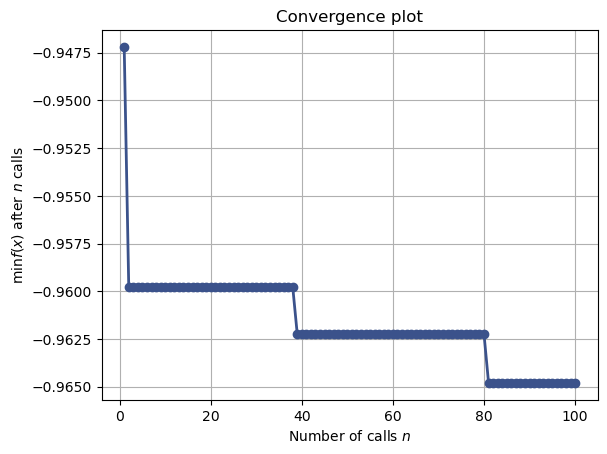

In [14]:
# evaluate the convergence of the search

plot_convergence(search)